In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_game.csv")

In [68]:
data.head()

,player,name,sex,age,level,play_time,completed,ftime,bdate
0,0,"Braund, Mr. Owen Harris",female,60,hard,11,0,0,7/24/1963
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,63,hard,21,1,0,1/27/1960
2,2,"Heikkinen, Miss. Laina",male,37,easy,19,0,0,8/3/1986
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,40,hard,22,1,7,11/20/1983
4,4,"Allen, Mr. William Henry",male,61,hard,10,1,2,5/9/1962


In [3]:
data

,player,name,sex,age,level,play_time,completed,ftime,bdate
0,0,"Braund, Mr. Owen Harris",female,60,hard,11,0,0,7/24/1963
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,63,hard,21,1,0,1/27/1960
2,2,"Heikkinen, Miss. Laina",male,37,easy,19,0,0,8/3/1986
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,40,hard,22,1,7,11/20/1983
4,4,"Allen, Mr. William Henry",male,61,hard,10,1,2,5/9/1962
...,...,...,...,...,...,...,...,...,...
244,244,"Attalah, Mr. Sleiman",female,57,hard,18,1,3,9/13/1966
245,245,"Minahan, Dr. William Edward",female,21,hard,22,1,2,10/17/2002
246,246,"Lindahl, Miss. Agda Thorilda Viktoria",male,26,hard,12,1,1,10/9/1997
247,247,"Hamalainen, Mrs. William (Anna)",female,51,hard,20,0,0,5/19/1972


In [70]:
data['month'] = pd.DatetimeIndex(data['bdate']).month
data['day'] = pd.DatetimeIndex(data['bdate']).day

<Axes: xlabel='month', ylabel='count'>

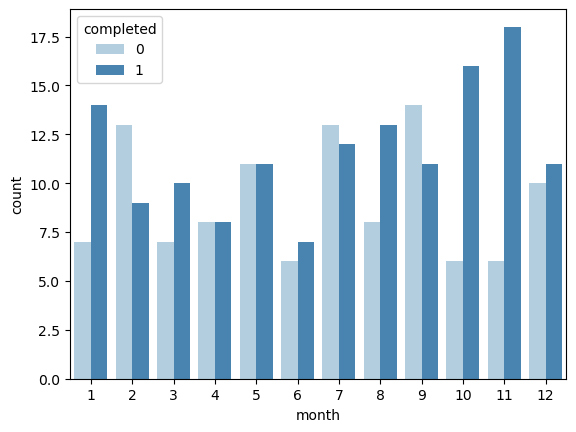

In [71]:
sns.countplot(data=data, x='month', hue='completed', palette='Blues')

In [26]:
bins = [0, 6, 12, 18, 24]
labels_time = ["0-6", "7-12", "13-18", "19-24"]
data["play_time_group"] = pd.cut(data["play_time"], bins=bins, labels=labels_time)

<Axes: xlabel='month', ylabel='Count'>

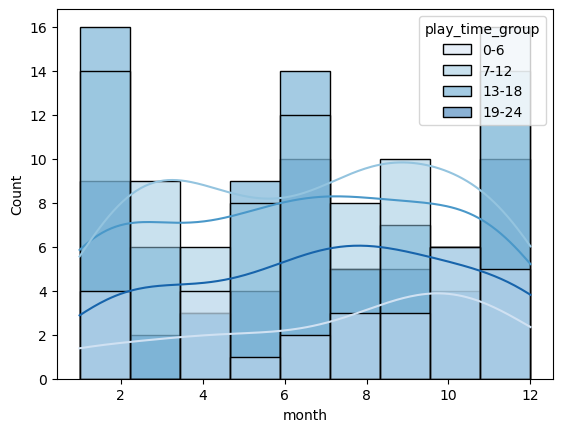

In [73]:
sns.histplot(data=data, x='month', hue='play_time_group', palette='Blues',kde=True)

<Axes: xlabel='month', ylabel='Count'>

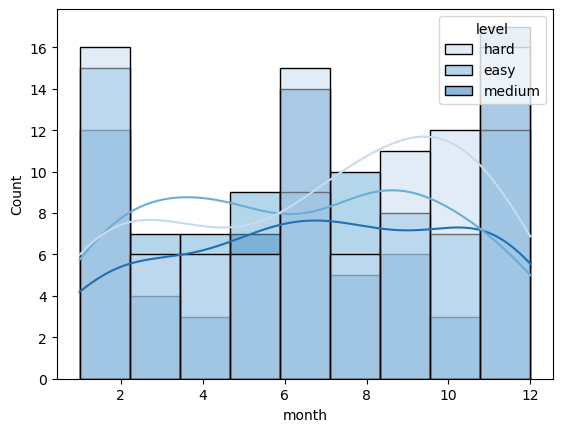

In [74]:
sns.histplot(data=data, x='month', hue='level', palette='Blues',kde=True)

<Axes: xlabel='day', ylabel='Count'>

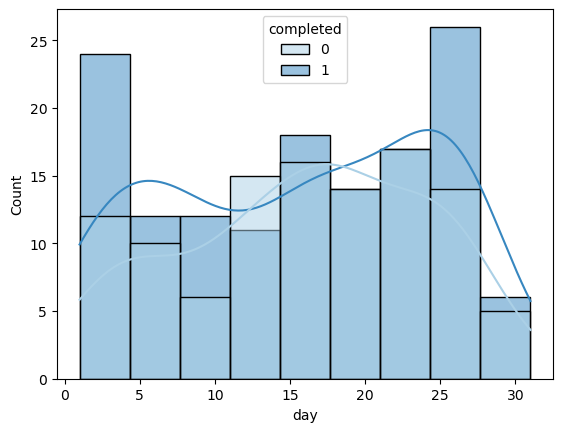

In [75]:
sns.histplot(data=data, x='day', hue='completed', palette='Blues',kde=True)

<Axes: xlabel='day', ylabel='Count'>

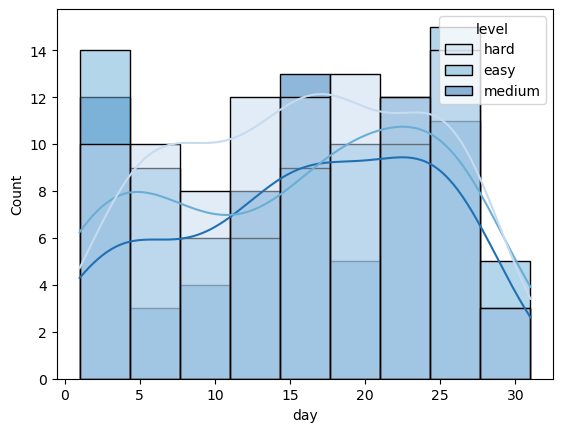

In [76]:
sns.histplot(data=data, x='day', hue='level', palette='Blues',kde=True)

In [17]:
bins = [0, 18, 30, 40, 50, 60, 70]

In [18]:
labels = ["0-18","19-30", "31-40", "41-50", "51-60", "61-70"]

In [19]:
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

<Axes: xlabel='age_group', ylabel='count'>

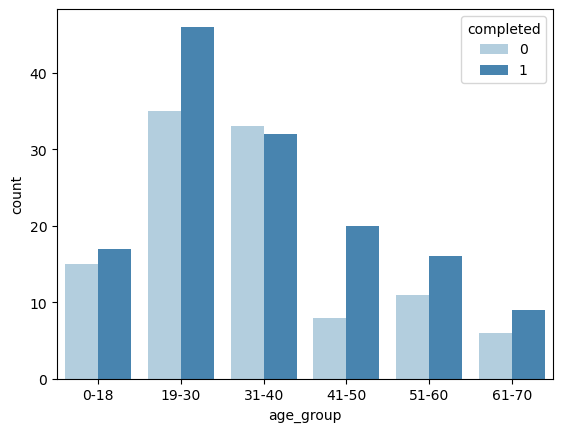

In [23]:
sns.countplot(data=data, x='age_group', hue='completed', palette='Blues')

In [24]:
data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

<Axes: xlabel='age_group', ylabel='count'>

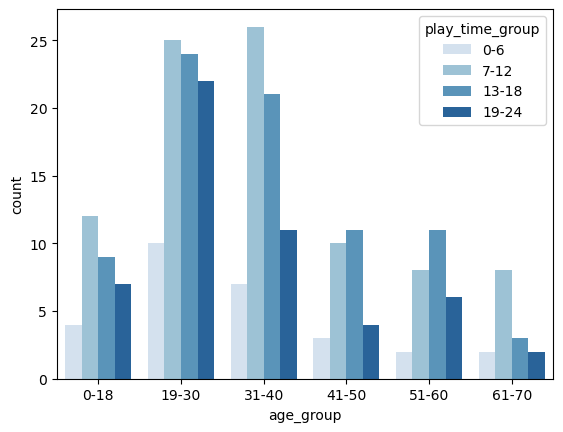

In [27]:
sns.countplot(data=data, x='age_group', hue='play_time_group', palette='Blues')

<Axes: xlabel='sex', ylabel='count'>

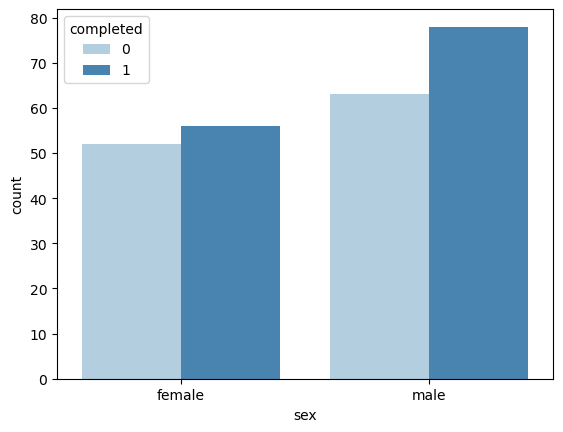

In [22]:
sns.countplot(data=data, x='sex', hue='completed', palette='Blues')

<Axes: xlabel='play_time', ylabel='count'>

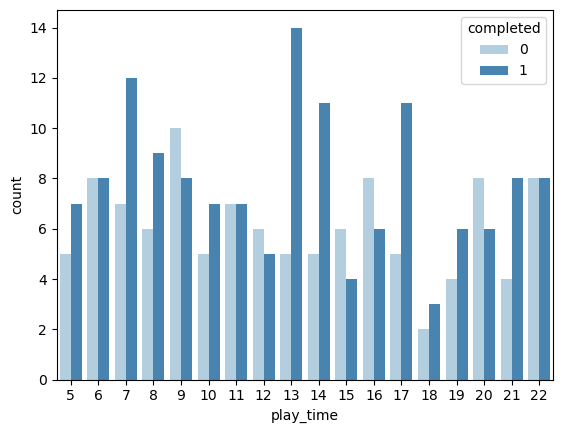

In [111]:
sns.countplot(data=data, x='play_time', hue='completed', palette='Blues')

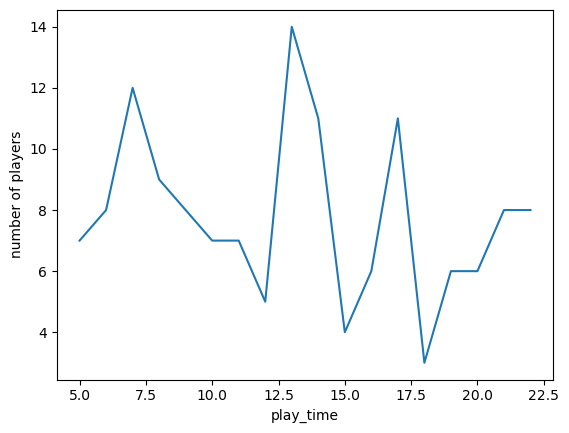

In [114]:
filtered_data = data[data['completed'] == 1]
count_by_time = filtered_data.groupby('play_time').size().reset_index(name='count')
sns.lineplot(data=count_by_time, x='play_time', y='count')
plt.xlabel('play_time')
plt.ylabel('number of players')
plt.show()

<Axes: xlabel='play_time', ylabel='count'>

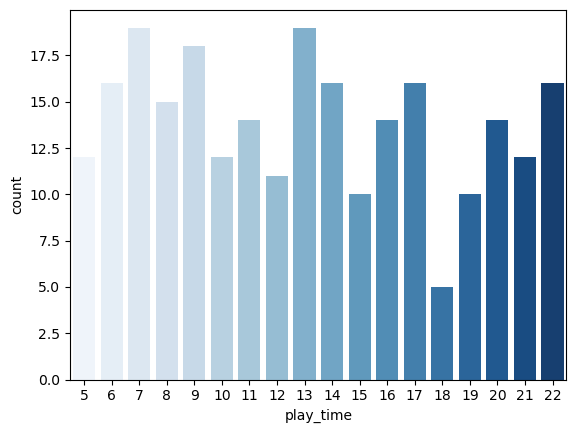

In [49]:
sns.countplot(data=data, x='play_time', palette='Blues')

<Axes: xlabel='ftime', ylabel='count'>

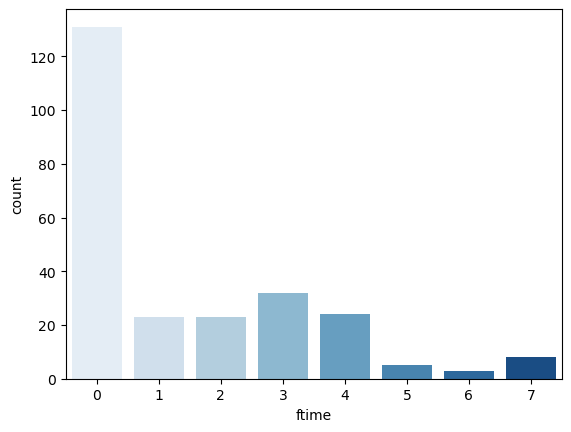

In [45]:
sns.countplot(data=data, x='ftime', palette='Blues')

<Axes: xlabel='ftime', ylabel='count'>

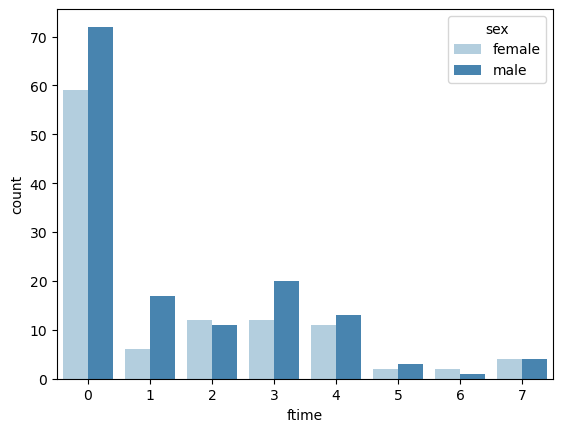

In [46]:
sns.countplot(data=data, x='ftime', hue='sex', palette='Blues')

<Axes: xlabel='age', ylabel='ftime'>

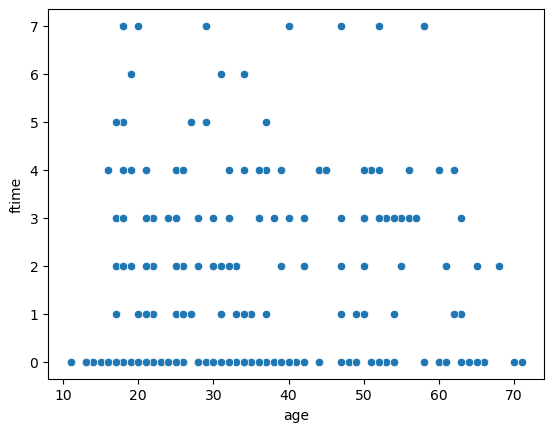

In [47]:
sns.scatterplot(data=data, x='age', y='ftime')

<Axes: xlabel='age_group', ylabel='ftime'>

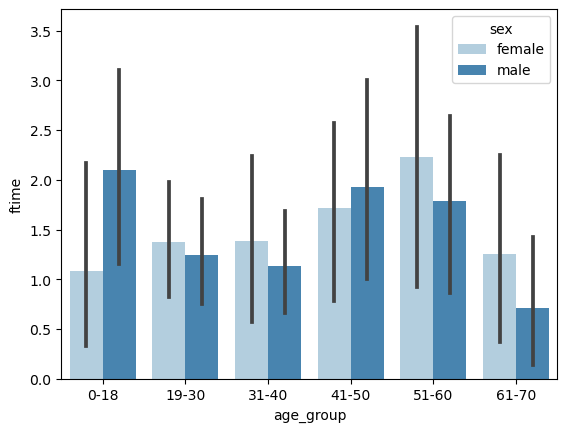

In [105]:
sns.barplot(data=data, x='age_group',y='ftime',hue='sex', palette='Blues')

<Axes: xlabel='play_time', ylabel='Count'>

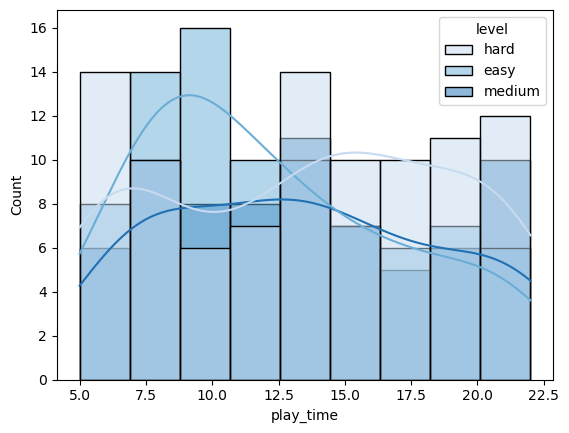

In [43]:
sns.histplot(data=data, x='play_time', hue='level', palette='Blues',kde=True)

<Axes: xlabel='level', ylabel='count'>

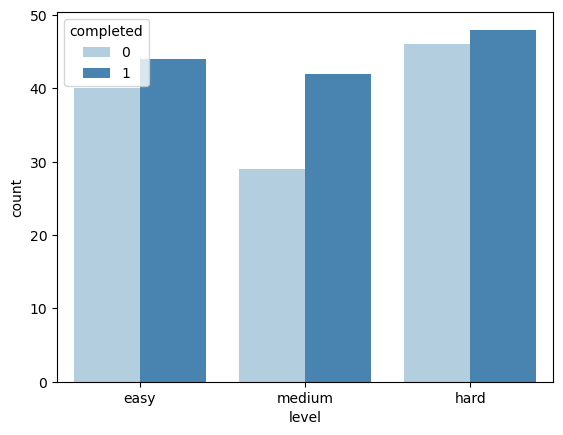

In [30]:
sns.countplot(data=data, x='level', hue='completed', palette='Blues',order=["easy", "medium", "hard"])

<Axes: xlabel='ftime', ylabel='count'>

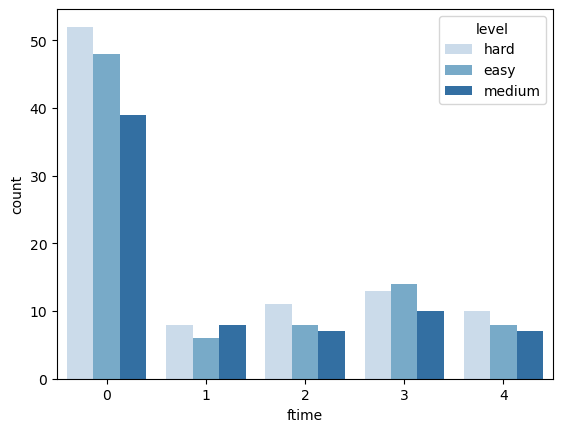

In [31]:
sns.countplot(data=data, x='ftime', hue='level', palette='Blues')

In [32]:
level_completed = data.groupby("level")["completed"].sum()

In [33]:
level_completed_percentage = level_completed / len(data) * 100

([<matplotlib.patches.Wedge at 0x26ff471f010>,
 [Text(0.5648216300138599, 0.9439155292018914, 'easy'),
  Text(-1.0987909826516808, -0.051559445723879764, 'hard'),
  Text(0.6084442503287865, -0.9164036197232316, 'medium')],
 [Text(0.30808452546210535, 0.5148630159283043, '32.8%'),
  Text(-0.5993405359918258, -0.028123334031207144, '35.8%'),
  Text(0.33187868199751985, -0.49985651984903534, '31.3%')])

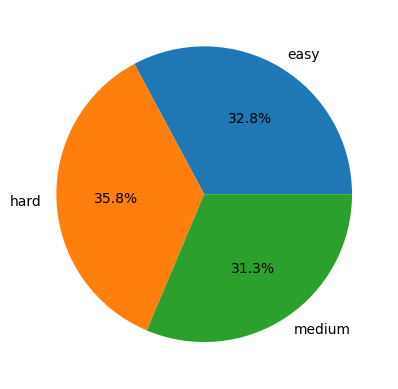

In [34]:
plt.pie(level_completed_percentage, labels=level_completed.index, autopct="%.1f%%")

<Axes: xlabel='level', ylabel='count'>

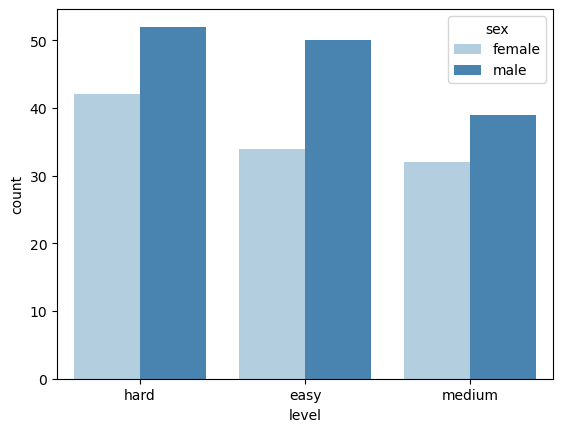

In [26]:
sns.countplot(data=data, x='level', hue='sex', palette='Blues')

<Axes: xlabel='level', ylabel='count'>

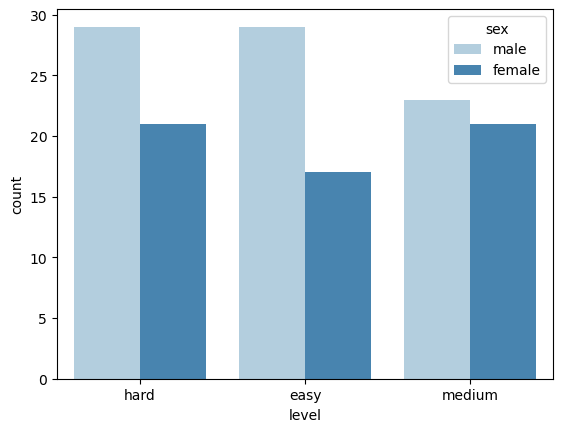

In [33]:
filtered_data = data[data['completed'] == 1]
sns.countplot(data=filtered_data, x='level', hue='sex', palette='Blues')

In [32]:
easy_level_data = data[data['level'] == "easy"]
easy_level_data

,player,name,sex,age,level,play_time,completed,ftime,bdate,age_group,play_time_group
2,2,"Heikkinen, Miss. Laina",male,37,easy,19,0,0,8/3/1986,31-40,19-24
8,8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",male,34,easy,14,1,0,8/13/1989,31-40,13-18
9,9,"Nasser, Mrs. Nicholas (Adele Achem)",female,58,easy,17,0,0,8/31/1965,51-60,13-18
10,10,"Sandstrom, Miss. Marguerite Rut",male,54,easy,5,0,0,9/12/1969,51-60,0-6
12,12,"Saundercock, Mr. William Henry",male,22,easy,13,1,1,1/20/2001,19-30,13-18
...,...,...,...,...,...,...,...,...,...,...,...
224,224,"Hoyt, Mr. Frederick Maxfield",male,30,easy,10,0,0,6/5/1993,19-30,7-12
226,226,"Mellors, Mr. William John",female,22,easy,15,0,0,5/5/2001,19-30,13-18
228,228,"Fahlstrom, Mr. Arne Jonas",male,39,easy,7,0,0,12/17/1984,31-40,7-12
229,229,"Lefebre, Miss. Mathilde",male,28,easy,13,1,0,3/9/1995,19-30,13-18


In [31]:
medium_level_data = data[data['level'] == "medium"]
medium_level_data

,player,name,sex,age,level,play_time,completed,ftime,bdate,age_group,play_time_group
15,15,"Hewlett, Mrs. (Mary D Kingcome)",male,38,medium,17,1,0,7/11/1985,31-40,13-18
16,16,"Rice, Master. Eugene",male,31,medium,10,0,0,1/16/1992,31-40,7-12
21,21,"Beesley, Mr. Lawrence",female,33,medium,10,1,2,11/4/1990,31-40,7-12
25,25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,66,medium,9,0,0,12/15/1957,61-70,7-12
34,34,"Meyer, Mr. Edgar Joseph",male,33,medium,22,0,0,9/26/1990,31-40,19-24
...,...,...,...,...,...,...,...,...,...,...,...
232,232,"Sjostedt, Mr. Ernst Adolf",female,35,medium,22,0,0,12/17/1988,31-40,19-24
236,236,"Hold, Mr. Stephen",male,32,medium,13,1,3,12/21/1991,31-40,13-18
238,238,"Pengelly, Mr. Frederick William",female,27,medium,21,1,1,1/13/1996,19-30,19-24
239,239,"Hunt, Mr. George Henry",male,42,medium,19,1,2,12/13/1981,41-50,19-24


In [29]:
hard_level_data = data[data['level'] == "hard"]
hard_level_data

,player,name,sex,age,level,play_time,completed,ftime,bdate,age_group,play_time_group
0,0,"Braund, Mr. Owen Harris",female,60,hard,11,0,0,7/24/1963,51-60,7-12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,63,hard,21,1,0,1/27/1960,61-70,19-24
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,40,hard,22,1,7,11/20/1983,31-40,19-24
4,4,"Allen, Mr. William Henry",male,61,hard,10,1,2,5/9/1962,61-70,7-12
5,5,"Moran, Mr. James",female,52,hard,17,1,7,5/27/1971,51-60,13-18
...,...,...,...,...,...,...,...,...,...,...,...
244,244,"Attalah, Mr. Sleiman",female,57,hard,18,1,3,9/13/1966,51-60,13-18
245,245,"Minahan, Dr. William Edward",female,21,hard,22,1,2,10/17/2002,19-30,19-24
246,246,"Lindahl, Miss. Agda Thorilda Viktoria",male,26,hard,12,1,1,10/9/1997,19-30,7-12
247,247,"Hamalainen, Mrs. William (Anna)",female,51,hard,20,0,0,5/19/1972,51-60,19-24


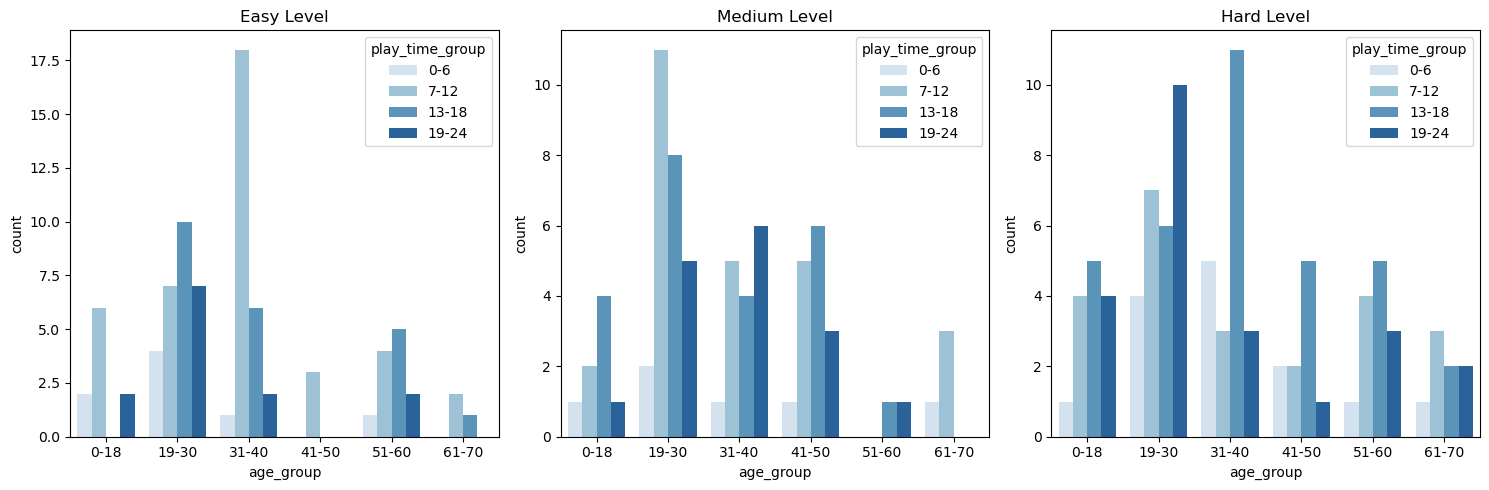

In [40]:

plt.subplot(1, 3, 1)
sns.countplot(data=easy_level_data, x='age_group', hue='play_time_group', palette='Blues')
plt.title('Easy Level')

plt.subplot(1, 3, 2)
sns.countplot(data=medium_level_data, x='age_group', hue='play_time_group', palette='Blues')
plt.title('Medium Level')

plt.subplot(1, 3, 3)
sns.countplot(data=hard_level_data, x='age_group', hue='play_time_group', palette='Blues')
plt.title('Hard Level')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()

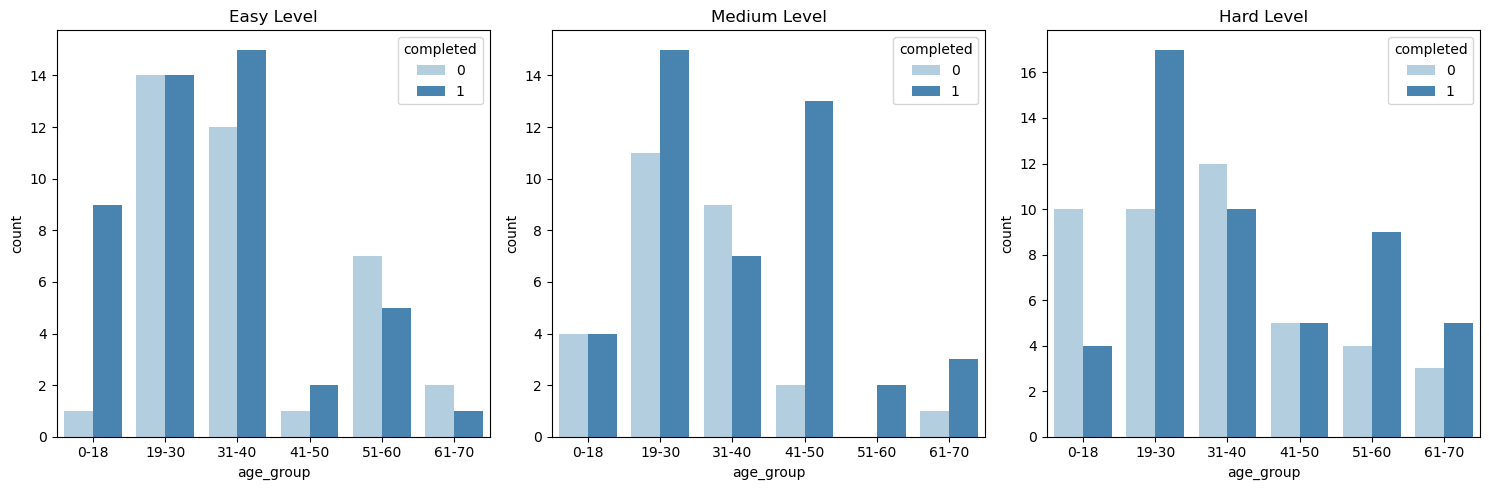

In [34]:
plt.subplot(1, 3, 1)
sns.countplot(data=easy_level_data, x='age_group', hue='completed', palette='Blues')
plt.title('Easy Level')

plt.subplot(1, 3, 2)
sns.countplot(data=medium_level_data, x='age_group', hue='completed', palette='Blues')
plt.title('Medium Level')

plt.subplot(1, 3, 3)
sns.countplot(data=hard_level_data, x='age_group', hue='completed', palette='Blues')
plt.title('Hard Level')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()

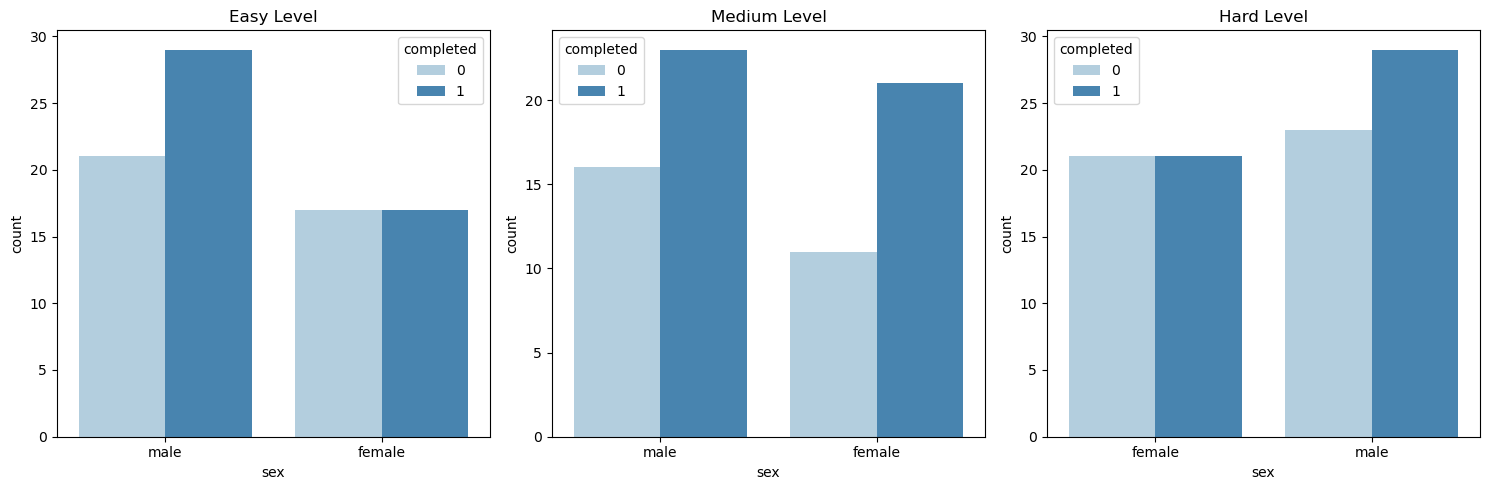

In [35]:
plt.subplot(1, 3, 1)
sns.countplot(data=easy_level_data, x='sex', hue='completed', palette='Blues')
plt.title('Easy Level')

plt.subplot(1, 3, 2)
sns.countplot(data=medium_level_data, x='sex', hue='completed', palette='Blues')
plt.title('Medium Level')

plt.subplot(1, 3, 3)
sns.countplot(data=hard_level_data, x='sex', hue='completed', palette='Blues')
plt.title('Hard Level')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()

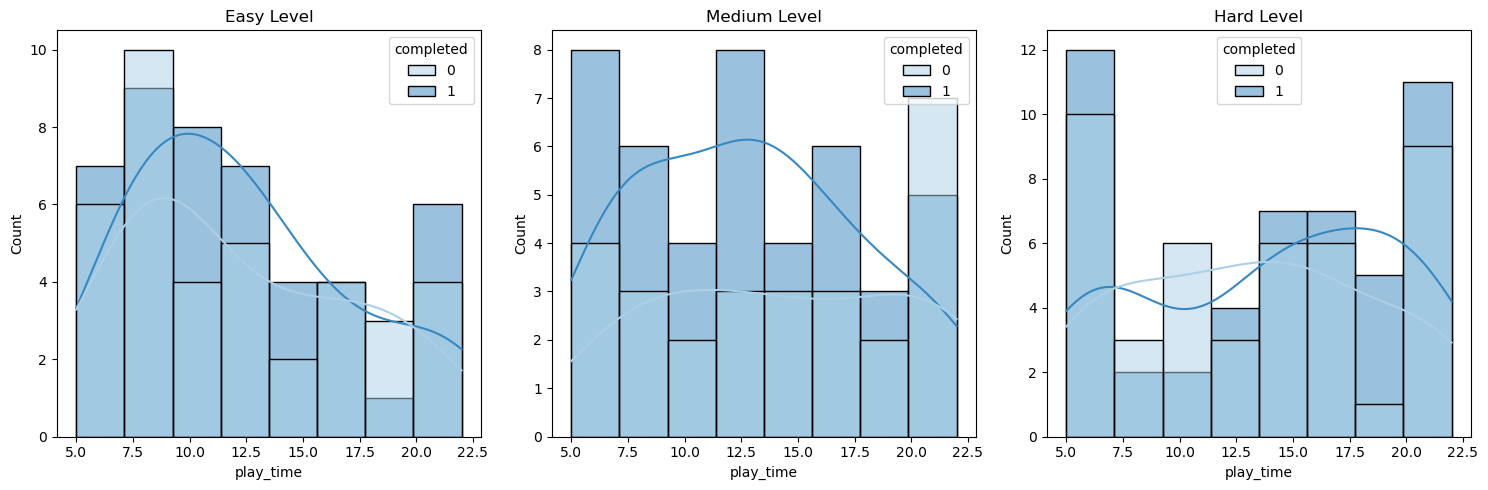

In [36]:
plt.subplot(1, 3, 1)
sns.histplot(data=easy_level_data, x='play_time', hue='completed', palette='Blues', kde=True)
plt.title('Easy Level')

plt.subplot(1, 3, 2)
sns.histplot(data=medium_level_data, x='play_time', hue='completed', palette='Blues', kde=True)
plt.title('Medium Level')

plt.subplot(1, 3, 3)
sns.histplot(data=hard_level_data, x='play_time', hue='completed', palette='Blues', kde=True)
plt.title('Hard Level')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()

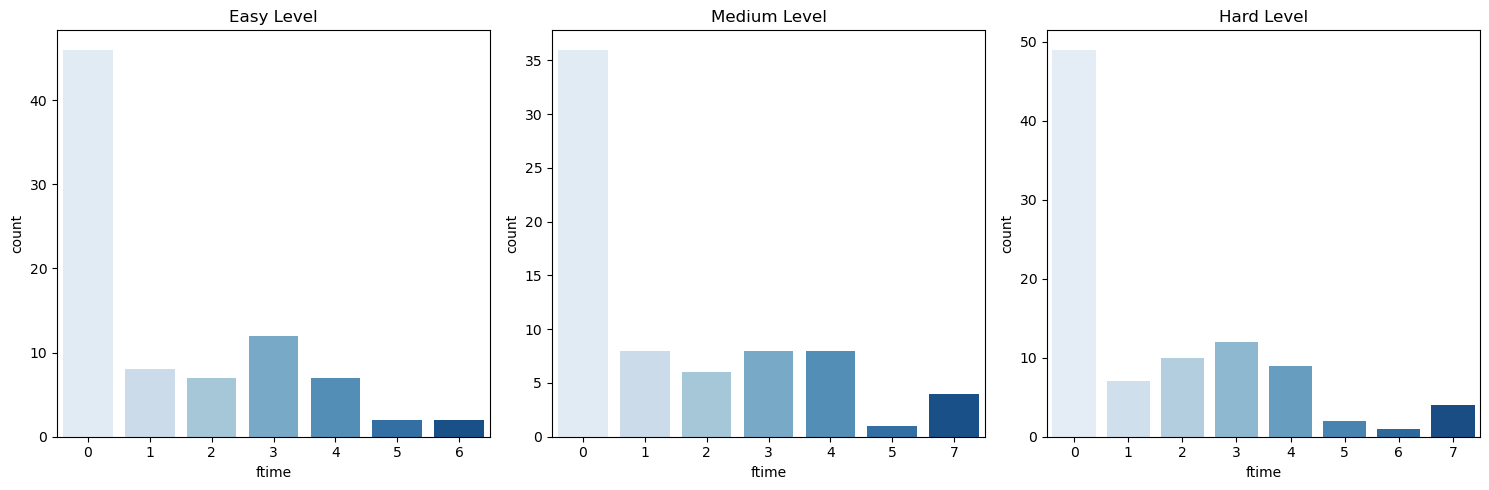

In [37]:
plt.subplot(1, 3, 1)
sns.countplot(data=easy_level_data, x='ftime', palette='Blues')
plt.title('Easy Level')

plt.subplot(1, 3, 2)
sns.countplot(data=medium_level_data, x='ftime', palette='Blues')
plt.title('Medium Level')

plt.subplot(1, 3, 3)
sns.countplot(data=hard_level_data, x='ftime', palette='Blues')
plt.title('Hard Level')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()

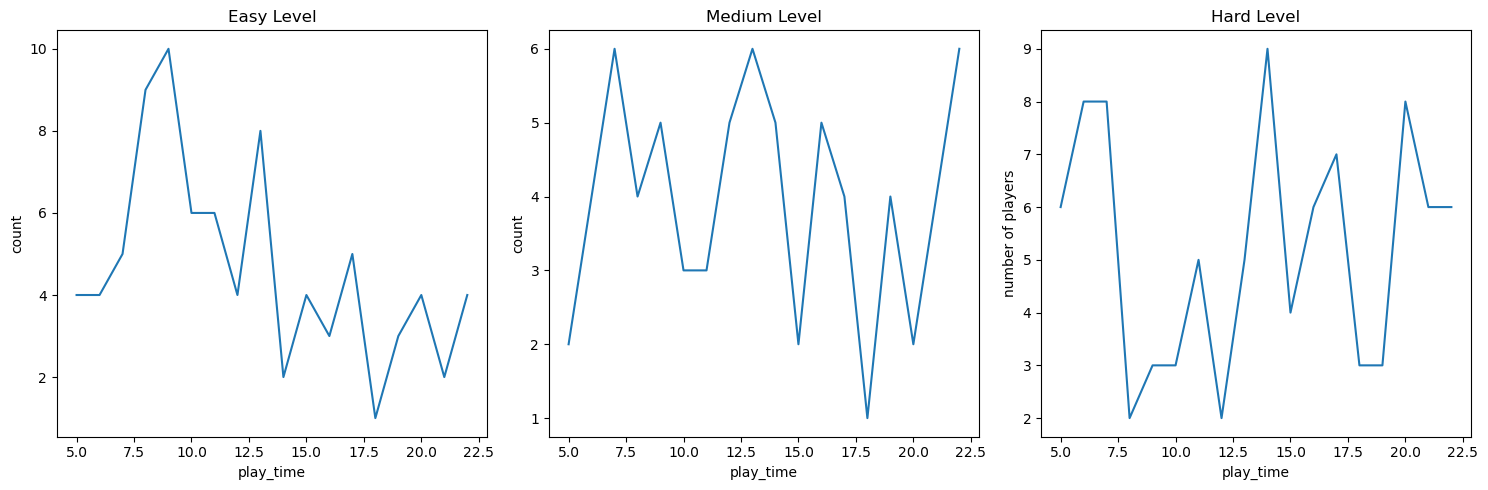

In [38]:
plt.subplot(1, 3, 1)
easy_count_by_time = easy_level_data.groupby('play_time').size().reset_index(name='count')
sns.lineplot(data=easy_count_by_time, x='play_time', y='count')
plt.title('Easy Level')

plt.subplot(1, 3, 2)
medium_count_by_time = medium_level_data.groupby('play_time').size().reset_index(name='count')
sns.lineplot(data=medium_count_by_time, x='play_time', y='count')
plt.title('Medium Level')

plt.subplot(1, 3, 3)
hard_count_by_time = hard_level_data.groupby('play_time').size().reset_index(name='count')
sns.lineplot(data=hard_count_by_time, x='play_time', y='count')
plt.title('Hard Level')

plt.xlabel('play_time')
plt.ylabel('number of players')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()

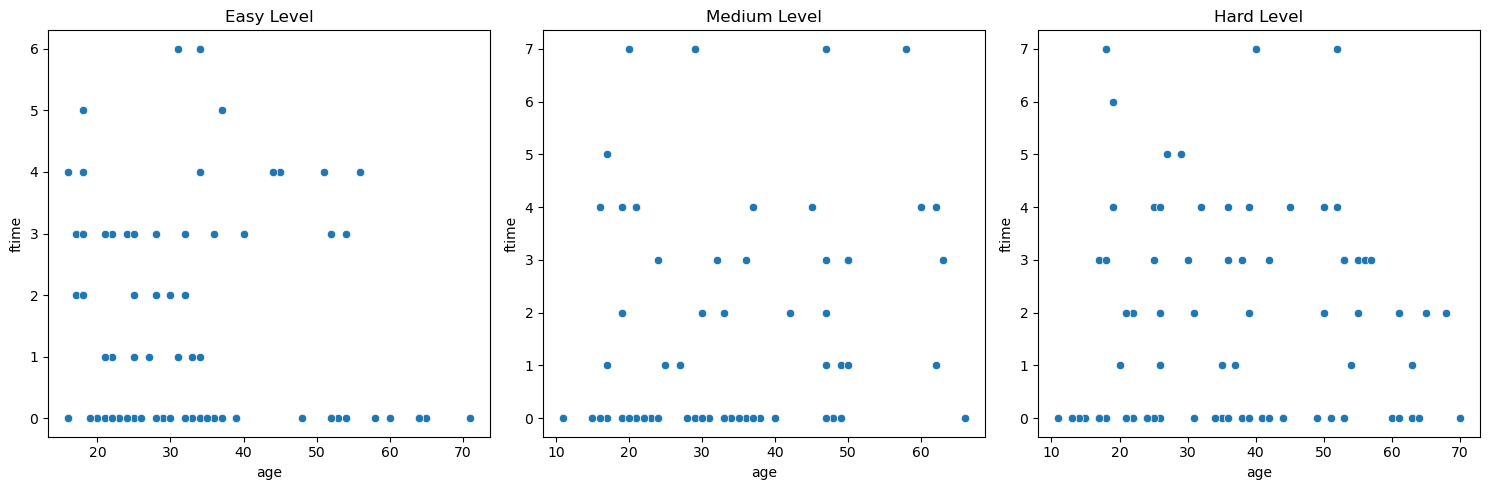

In [39]:
plt.subplot(1, 3, 1)
sns.scatterplot(data=easy_level_data, x='age', y='ftime')
plt.title('Easy Level')

plt.subplot(1, 3, 2)
sns.scatterplot(data=medium_level_data, x='age', y='ftime')
plt.title('Medium Level')

plt.subplot(1, 3, 3)
sns.scatterplot(data=hard_level_data, x='age', y='ftime')
plt.title('Hard Level')

fig = plt.gcf()
fig.set_size_inches(15, 5)

plt.tight_layout()
plt.show()